
# Import Data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import ta
from ta import add_all_ta_features

# Clean Data

In [255]:
data = pd.read_csv('tickdata_20220805.csv')
# extract rows where column 2 is 000009.SZ
data = data[data['COLUMN02'] == '000009.SZ']
# sort by column 3
data = data.sort_values(by=['COLUMN03'])

# drop first row
data = data.drop(data.index[0])


print(data['COLUMN03'].dtypes)
data['COLUMN03'] = data['COLUMN03'].astype(str).str[:-3]
data['COLUMN03'] = data['COLUMN03'].astype(int)
# make a list to divide columns 04 to 17, 28-37, 52-55 by 10000
columns = ['COLUMN04', 'COLUMN05', 'COLUMN06', 'COLUMN07', 'COLUMN08', 'COLUMN09', 'COLUMN10', 'COLUMN11', 'COLUMN12', 'COLUMN13', 'COLUMN14', 'COLUMN15', 'COLUMN16', 'COLUMN17', 'COLUMN28', 'COLUMN29', 'COLUMN30', 'COLUMN31', 'COLUMN32', 'COLUMN33', 'COLUMN34', 'COLUMN35', 'COLUMN36', 'COLUMN37', 'COLUMN52', 'COLUMN53', 'COLUMN54', 'COLUMN55']
# divide the columns by 10000
data[columns] = data[columns] / 10000
# # convert the 'COLUMN03' column to datetime format
data['COLUMN03'] = pd.to_datetime(data['COLUMN03'], format='%H%M%S')
data

int64


,COLUMN01,COLUMN02,COLUMN03,COLUMN04,COLUMN05,COLUMN06,COLUMN07,COLUMN08,COLUMN09,COLUMN10,...,COLUMN46,COLUMN47,COLUMN48,COLUMN49,COLUMN50,COLUMN51,COLUMN52,COLUMN53,COLUMN54,COLUMN55
496,496,000009.SZ,1900-01-01 09:30:00,13.96,13.96,13.93,13.94,13.94,13.95,13.96,...,19200,4300,297900,4158177,917700,3842660,15.36,12.56,13.47,14.81
914,914,000009.SZ,1900-01-01 09:30:03,13.96,13.97,13.90,13.90,13.93,13.94,13.95,...,4900,21200,460200,6419435,1136500,4805860,15.36,12.56,13.49,14.75
1603,1603,000009.SZ,1900-01-01 09:30:06,13.96,13.97,13.86,13.94,13.94,13.95,13.96,...,32000,4000,555700,7748214,1192200,5063160,15.36,12.56,13.49,14.75
2121,2121,000009.SZ,1900-01-01 09:30:09,13.96,13.97,13.86,13.91,13.91,13.92,13.94,...,32000,4000,567600,7913628,1217800,5253960,15.36,12.56,13.50,14.75
2579,2579,000009.SZ,1900-01-01 09:30:12,13.96,13.97,13.86,13.92,13.93,13.94,13.95,...,21200,33300,573100,7990078,1230800,5281860,15.36,12.56,13.50,14.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236298,2236298,000009.SZ,1900-01-01 14:59:15,13.96,14.61,13.62,14.32,14.32,0.00,0.00,...,0,0,103056566,1471732003,0,0,15.36,12.56,0.00,0.00
2237165,2237165,000009.SZ,1900-01-01 14:59:24,13.96,14.61,13.62,14.32,14.32,0.00,0.00,...,0,0,103056566,1471732003,0,0,15.36,12.56,0.00,0.00
2238027,2238027,000009.SZ,1900-01-01 14:59:33,13.96,14.61,13.62,14.32,14.32,0.00,0.00,...,0,0,103056566,1471732003,0,0,15.36,12.56,0.00,0.00
2238980,2238980,000009.SZ,1900-01-01 14:59:42,13.96,14.61,13.62,14.32,14.32,0.00,0.00,...,0,0,103056566,1471732003,0,0,15.36,12.56,0.00,0.00


# Plot Price Progression

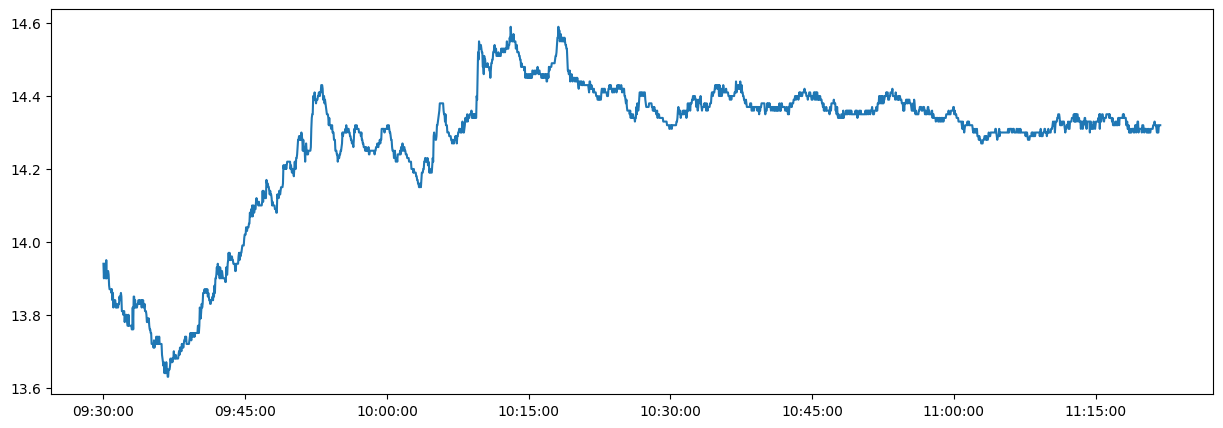

In [242]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,5)

ax.plot(data['COLUMN03'], data['COLUMN07'])
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

plt.show()

# Feature Engineering

In [243]:
# Price Gain and Loss
data['diff'] = data['COLUMN07'].diff()
data['gain'] = data['diff'].clip(lower=0).round(2)
data['loss'] = data['diff'].clip(upper=0).round(2)



# Bollinger Bands

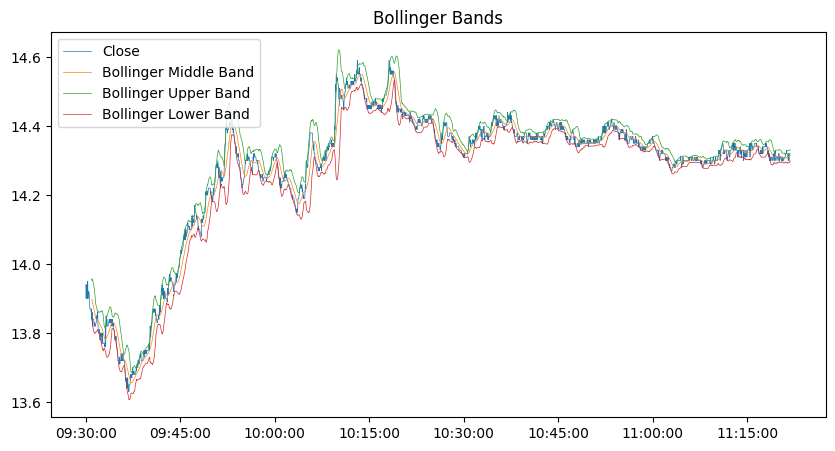

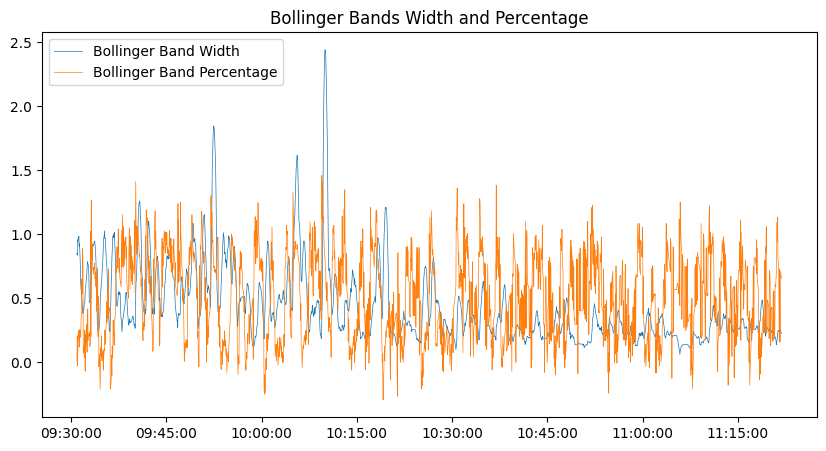

In [244]:
# instantiate Bollinger Bands indicator
ta_bbands = ta.volatility.BollingerBands(close=data["COLUMN07"],
                                         window=20,
                                         window_dev=2)


# copy as we will be adding to it temporarily
ta_df = data.copy()

# add Bollinger Bands
ta_df['bb_bbm'] = ta_bbands.bollinger_mavg()
ta_df['bb_bbh'] = ta_bbands.bollinger_hband()
ta_df['bb_bbl'] = ta_bbands.bollinger_lband()

ta_df['bb_bbhi'] = ta_bbands.bollinger_hband_indicator()
ta_df['bb_bbli'] = ta_bbands.bollinger_lband_indicator()
ta_df['bb_bbw'] = ta_bbands.bollinger_wband()
ta_df['bb_bbp'] = ta_bbands.bollinger_pband()

ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()


# plot columns in different subplots
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['COLUMN07'], label='Close', lw=0.5)
ax.plot(ta_df['COLUMN03'], ta_df['bb_bbm'], label='Bollinger Middle Band', lw=0.5)
ax.plot(ta_df['COLUMN03'], ta_df['bb_bbh'], label='Bollinger Upper Band', lw=0.5)
ax.plot(ta_df['COLUMN03'], ta_df['bb_bbl'], label='Bollinger Lower Band', lw=0.5)
ax.set_title('Bollinger Bands')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['bb_bbw'], label='Bollinger Band Width', lw=0.5)
ax.plot(ta_df['COLUMN03'], ta_df['bb_bbp'], label='Bollinger Band Percentage', lw=0.5)
ax.set_title('Bollinger Bands Width and Percentage')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()

# RSI

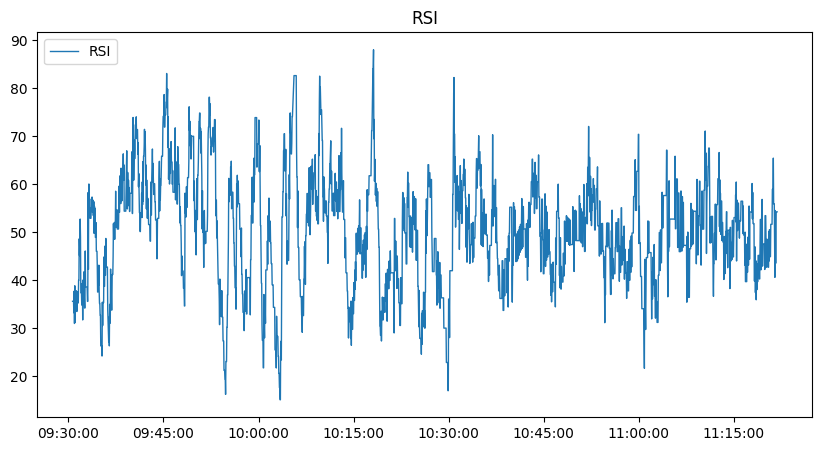

In [245]:

# instantiate RSI indicator
ta_RSI = ta.momentum.RSIIndicator(close=data["COLUMN07"], window=14)
ta_df['RSI'] = ta_RSI.rsi()

# plot rsi
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['RSI'], label='RSI', lw=1)
ax.set_title('RSI')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()

# MACD

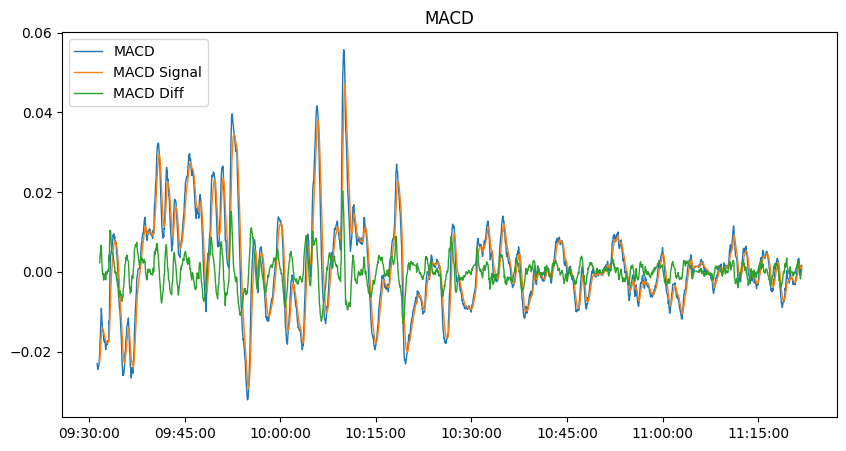

In [246]:

# instantiate MACD indicator
ta_macd = ta.trend.MACD(close=data["COLUMN07"], window_slow=26, window_fast=12, window_sign=9)
ta_df['MACD'] = ta_macd.macd()
ta_df['MACD_signal'] = ta_macd.macd_signal()
ta_df['MACD_diff'] = ta_macd.macd_diff()

# plot macd
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['MACD'], label='MACD', lw=1)
ax.plot(ta_df['COLUMN03'], ta_df['MACD_signal'], label='MACD Signal', lw=1)
ax.plot(ta_df['COLUMN03'], ta_df['MACD_diff'], label='MACD Diff', lw=1)
ax.set_title('MACD')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()

# Stochastic Oscillator

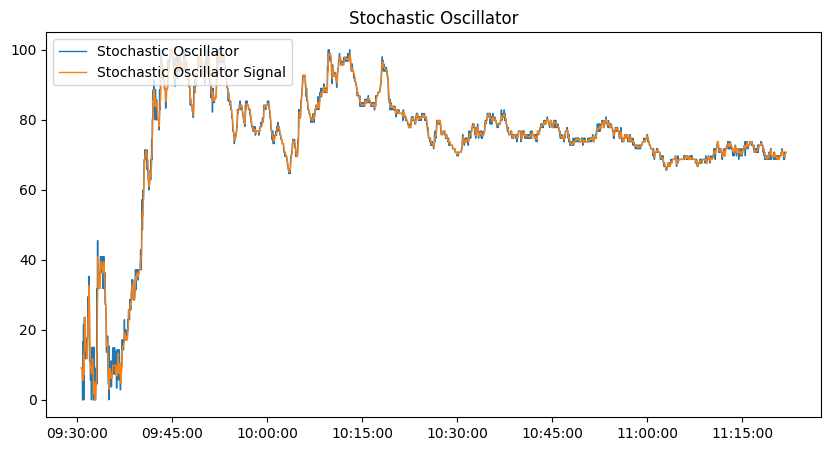

In [247]:
# instantiate Stochastic Oscillator indicator
ta_stoch = ta.momentum.StochasticOscillator(high=data["COLUMN05"], low=data["COLUMN06"], close=data["COLUMN07"], window=14, smooth_window=3)
ta_df['stoch_k'] = ta_stoch.stoch()
ta_df['stoch_d'] = ta_stoch.stoch_signal()

# plot stochastic oscillator
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['stoch_k'], label='Stochastic Oscillator', lw=1)
ax.plot(ta_df['COLUMN03'], ta_df['stoch_d'], label='Stochastic Oscillator Signal', lw=1)
ax.set_title('Stochastic Oscillator')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()

# ATR

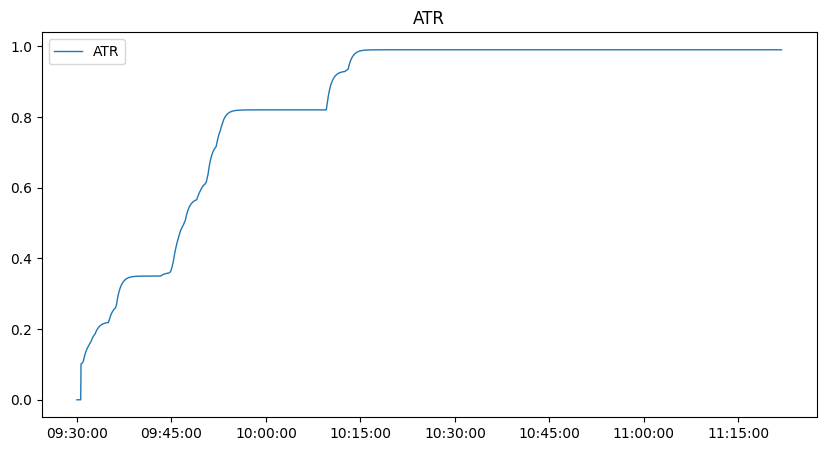

In [248]:

# instantiate ATR indicator
ta_atr = ta.volatility.AverageTrueRange(high=data["COLUMN05"], low=data["COLUMN06"], close=data["COLUMN07"], window=14)
ta_df['ATR'] = ta_atr.average_true_range()

# plot ATR
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['ATR'], label='ATR', lw=1)
ax.set_title('ATR')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()


# RMA (Wilder's Moving Average)

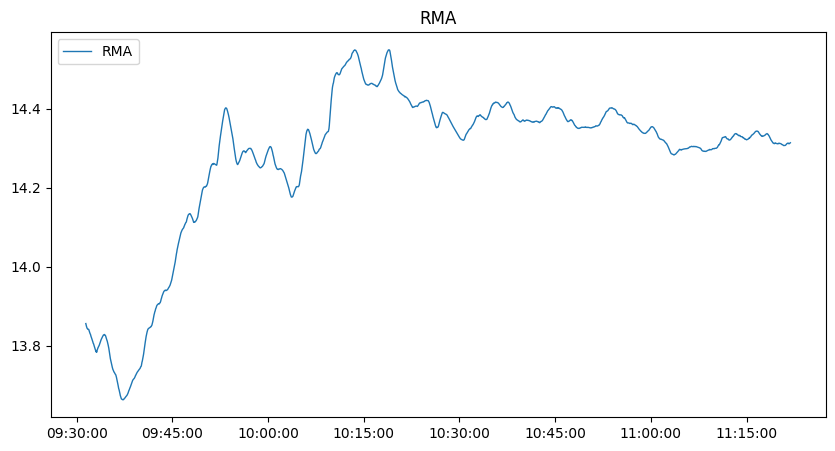

In [249]:
# instantiate RMA indicator
ta_rma = ta.trend.WMAIndicator(close=data["COLUMN07"], window=30)
ta_df['RMA'] = ta_rma.wma()

# plot RMA
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['RMA'], label='RMA', lw=1)
ax.set_title('RMA')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()



Plot rma and close price

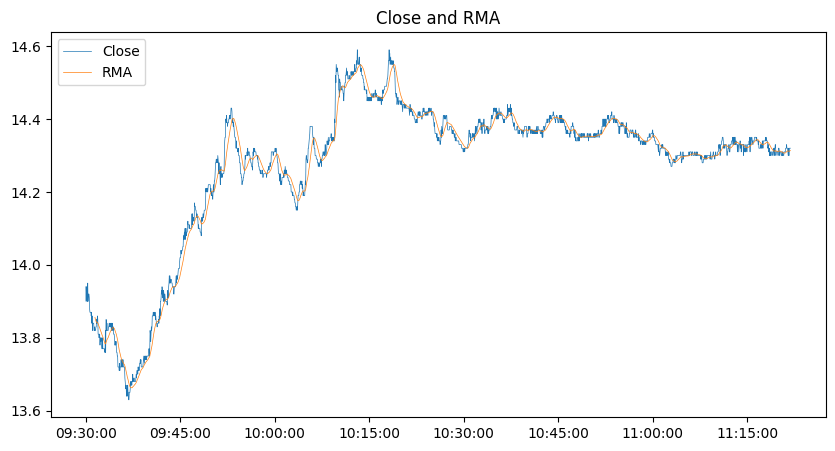

In [250]:

# plot columns in different subplots
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ta_df['COLUMN03'], ta_df['COLUMN07'], label='Close', lw=0.5)
ax.plot(ta_df['COLUMN03'], ta_df['RMA'], label='RMA', lw=0.5)
ax.set_title('Close and RMA')
ax.legend(loc='upper left')
xformatter = mdates.DateFormatter('%H:%M:%S')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.show()


In [251]:
ta_df['tick_count'] = ta_df['COLUMN03'].diff().dt.total_seconds()
ta_df['cumulative_tick_count'] = ta_df['tick_count'].cumsum()
ta_df

,COLUMN01,COLUMN02,COLUMN03,COLUMN04,COLUMN05,COLUMN06,COLUMN07,COLUMN08,COLUMN09,COLUMN10,...,RSI,MACD,MACD_signal,MACD_diff,stoch_k,stoch_d,ATR,RMA,tick_count,cumulative_tick_count
0,496,000009.SZ,1900-01-01 09:30:00,13.96,13.96,13.93,13.94,13.94,13.95,13.96,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,914,000009.SZ,1900-01-01 09:30:03,13.96,13.97,13.90,13.90,13.93,13.94,13.95,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,3.0,3.0
2,1603,000009.SZ,1900-01-01 09:30:06,13.96,13.97,13.86,13.94,13.94,13.95,13.96,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,3.0,6.0
3,2121,000009.SZ,1900-01-01 09:30:09,13.96,13.97,13.86,13.91,13.91,13.92,13.94,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,3.0,9.0
4,2579,000009.SZ,1900-01-01 09:30:12,13.96,13.97,13.86,13.92,13.93,13.94,13.95,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1046341,000009.SZ,1900-01-01 11:21:39,13.96,14.61,13.62,14.30,14.32,14.33,14.34,...,43.507878,-0.000716,0.001025,-0.001741,68.686869,69.360269,0.99,14.311183,3.0,6699.0
2234,1046816,000009.SZ,1900-01-01 11:21:42,13.96,14.61,13.62,14.32,14.31,14.32,14.33,...,54.213327,0.000105,0.000841,-0.000736,70.707071,69.360269,0.99,14.311849,3.0,6702.0
2235,1047292,000009.SZ,1900-01-01 11:21:45,13.96,14.61,13.62,14.32,14.32,14.33,14.34,...,54.213327,0.000747,0.000822,-0.000075,70.707071,70.033670,0.99,14.312495,3.0,6705.0
2236,1047743,000009.SZ,1900-01-01 11:21:48,13.96,14.61,13.62,14.32,14.32,14.33,14.34,...,54.213327,0.001242,0.000906,0.000335,70.707071,70.707071,0.99,14.313118,3.0,6708.0


# New Features Engineered:

1. Bolliinger Bands
2. RSI
3. MACD
4. Stochastic Oscillator
5. ATR
6. RMA

In [253]:
new_features_df = ta_df.to_csv('new_features_df.csv', index=False)